In [36]:
import torch
import numpy as np
from kmeans_pytorch import kmeans, kmeans_predict
import matplotlib.pyplot as plt

In [37]:
data_size, dims, num_clusters = 100000, 2, 3  # 平面坐标
# 随机生成两组数据，x用来进行训练，y用来进行预测，x与y遵循相同的分布
# x 与 y均在[0,1)之间
torch.manual_seed(0)
x = torch.rand((data_size, dims))
print(x)
y = torch.rand((100, dims))
print(y)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341],
        ...,
        [0.3940, 0.0602],
        [0.0643, 0.5775],
        [0.7935, 0.5059]])
tensor([[0.0258, 0.5179],
        [0.4353, 0.2864],
        [0.6135, 0.6459],
        [0.8227, 0.0469],
        [0.0610, 0.7512],
        [0.0746, 0.8440],
        [0.1163, 0.5712],
        [0.8833, 0.1726],
        [0.5602, 0.6672],
        [0.6008, 0.2334],
        [0.6936, 0.1430],
        [0.8556, 0.9621],
        [0.9968, 0.8197],
        [0.0701, 0.0717],
        [0.3664, 0.1152],
        [0.0994, 0.5454],
        [0.5957, 0.7139],
        [0.8089, 0.5453],
        [0.1422, 0.0087],
        [0.3137, 0.2668],
        [0.0319, 0.2317],
        [0.4146, 0.3837],
        [0.1661, 0.1092],
        [0.3573, 0.1245],
        [0.9705, 0.5730],
        [0.1667, 0.9721],
        [0.2335, 0.6745],
        [0.3992, 0.2241],
        [0.7610, 0.7730],
        [0.5207, 0.6237],
        [0.0998, 0.5474],
        [0.9593, 0.8403]

In [38]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
    

In [39]:
cluster_id, cluster_center_coordinates = kmeans(X=x, num_clusters=num_clusters, device=device)

running k-means on cuda:0..


[running kmeans]: 6it [00:00, 51.86it/s, center_shift=0.000099, iteration=6, tol=0.000100]


In [40]:
print(cluster_id)  # 每个点属于哪个中心点：0，1，2
print(cluster_center_coordinates)  # 所有中心点的坐标

tensor([1, 2, 0,  ..., 2, 0, 1])
tensor([[0.2268, 0.6722],
        [0.7625, 0.6989],
        [0.5160, 0.1989]])


In [41]:
# 用x训练出来的中心点进行预测
cluster_id_y = kmeans_predict(X=y, cluster_centers=cluster_center_coordinates, device=device)
print(cluster_id_y)

predicting on cuda:0..
tensor([0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
        1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 2, 0, 2])


(-2.0, 2.0)

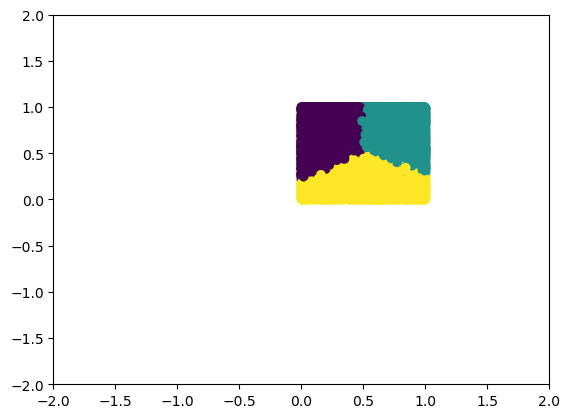

In [42]:
plt.scatter(x[:, 0], x[:, 1], c = cluster_id)
plt.xlim((-2,2))
plt.ylim((-2,2))

(-2.0, 2.0)

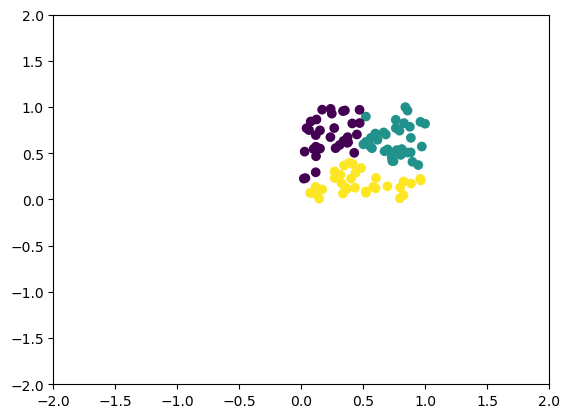

In [43]:
plt.scatter(y[:, 0], y[:, 1], c = cluster_id_y)
plt.xlim((-2,2))
plt.ylim((-2,2))